In [2]:
import numpy as np
from qiskit import *

In [3]:
#这是一个被折叠的代码块
# 获取二进制长度代码
# 使用 bin() 函数将整数转换为二进制字符串，并使用 len() 获取长度
# 调用函数
def length(number):
    binary_representation = bin(abs(number))[2:]  # 去掉前缀 "0b"，取绝对值
    binary_length = len(binary_representation)
    return binary_length

In [4]:
def leng(number,wid):
    binary_representation = np.binary_repr(number, width=wid)

    # 分离符号位和数字部分
    sign_bit = binary_representation[0]  # 符号位
    number_part = binary_representation[1:]  # 数字部分
    return sign_bit,number_part

In [5]:
p = [-4,12,-16]
x1 = p[0]
y1 = p[1]
z1 = p[2]
#,xa数字绝对值的长度，xl带符号的长度，x1数值，X分离正负后的二进制数
xa = length(x1)
ya = length(y1)
za = length(z1)
xl = xa+1
yl = ya+1
zl = za+1
print("xl等于：",xl)
print("yl等于：",yl)
print("zl等于：",zl)
X = leng(x1,xl)
Y = leng(y1,yl)
Z = leng(z1,zl)
Xq = int(X[0])
Xt = int(X[1])
Yq = int(Y[0])
Yt = int(Y[1])
Zq = int(Z[0])
Zt = int(Z[1])
print("X符号：",Xq,"   X二进制：",Xt)
print("Y符号：",Yq,"   Y二进制：",Yt)
print("Z符号：",Zq,"   Y二进制：",Zt)

xl等于： 4
yl等于： 5
zl等于： 6
X符号： 1    X二进制： 100
Y符号： 0    Y二进制： 1100
Z符号： 1    Y二进制： 10000


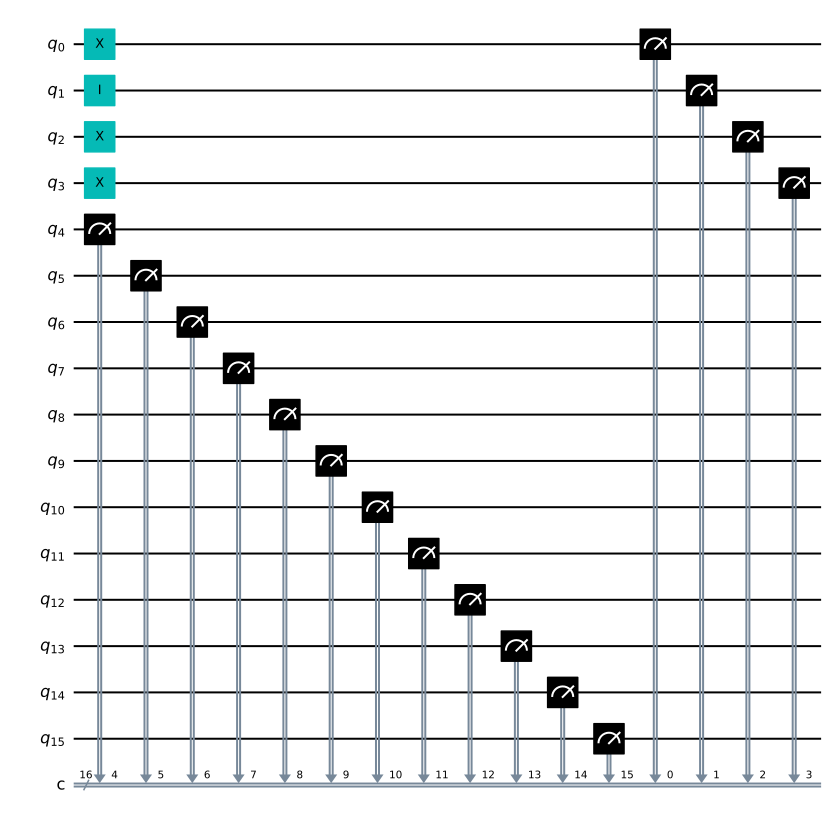

In [10]:
circ = QuantumCircuit(xl+yl+zl+1,xl+yl+zl+1)
circ.x(3)
if  Xq== 1:
    circ.x(0)
else:
    circ.i(0)
if  Yq== 1:
    circ.x(1)
else:
    circ.i(1)
if  Zq== 1:
    circ.x(2)
else:
    circ.i(2)
# map the quantum measurement to the classical bits
circ.measure(range(xl+yl+zl+1), range(xl+yl+zl+1))
circ.draw('mpl')

In [101]:
# Use Aer's qasm_simulator
backend_sim = Aer.get_backend('qasm_simulator')

# Execute the circuit on the qasm simulator.
# We've set the number of repeats of the circuit
# to be 1024, which is the default.
job_sim = backend_sim.run(transpile(circ, backend_sim), shots=1024)

# Grab the results from the job.
result_sim = job_sim.result()

In [107]:
counts = result_sim.get_counts(circ)
print(counts)

{'0000000000001101': 1024}


In [108]:
first_key, first_value = list(counts.items())[0]

print("第一个键:", first_key)
print("对应的值:", first_value)

第一个键: 0000000000001101
对应的值: 1024
